In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
def custom_warning_format(message, category, filename, lineno, file=None, line=None):
    return f'{filename}:{lineno}: {category.__name__}: {message}\n'

In [188]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Dia 8/salaries_eng.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [189]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 16534
Total de variables disponibles (columnas) = 11 
Columnas que cuentan con un valor nulo -
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [191]:
df2['job_title'].value_counts().head(10)

job_title
Data Engineer                3464
Data Scientist               3314
Data Analyst                 2440
Machine Learning Engineer    1705
Research Scientist            531
Applied Scientist             435
Data Architect                435
Analytics Engineer            431
Research Engineer             306
Data Science                  271
Name: count, dtype: int64

In [192]:
df2['job_title'].value_counts()

job_title
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: count, Length: 155, dtype: int64

# Analisis

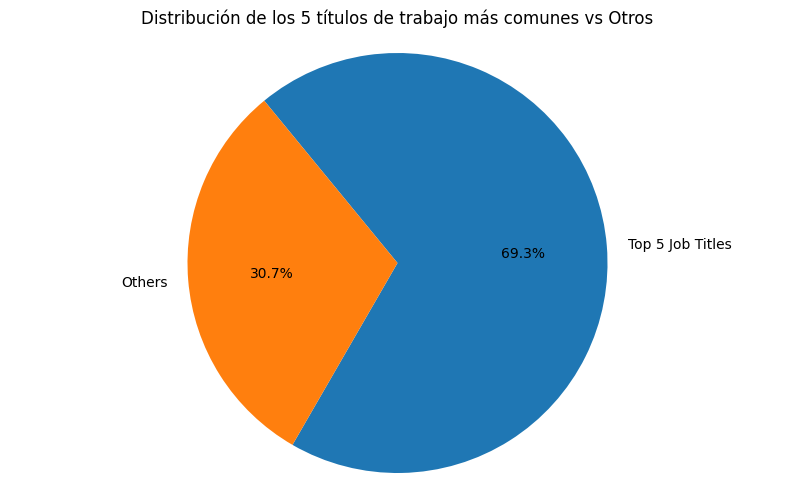

In [193]:
# Calcular los 11 títulos de trabajo más comunes
top_5_jobs = df2['job_title'].value_counts().nlargest(5)

# Sumar los valores de los 11 trabajos principales
top_5_job_sum = top_5_jobs.sum()

# Calcular el número total de trabajos
total_jobs_sum = df2['job_title'].value_counts().sum()

# Calcular el porcentaje de los 11 trabajos principales
top_11_job_percentage = (top_5_job_sum / total_jobs_sum) * 100

# Calcular el número y el porcentaje de los otros trabajos
otros_jobs_sum = total_jobs_sum - top_5_job_sum
otros_jobs_percentage = (otros_jobs_sum / total_jobs_sum) * 100

# Datos para el gráfico de pastel
labels = ['Top 5 Job Titles', 'Others']
sizes = [top_11_job_percentage, otros_jobs_percentage]

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240)
plt.axis('equal')  # Asegurar que el gráfico es circular
plt.title('Distribución de los 5 títulos de trabajo más comunes vs Otros')
plt.show()

In [194]:
print(top_5_jobs)

job_title
Data Engineer                3464
Data Scientist               3314
Data Analyst                 2440
Machine Learning Engineer    1705
Research Scientist            531
Name: count, dtype: int64


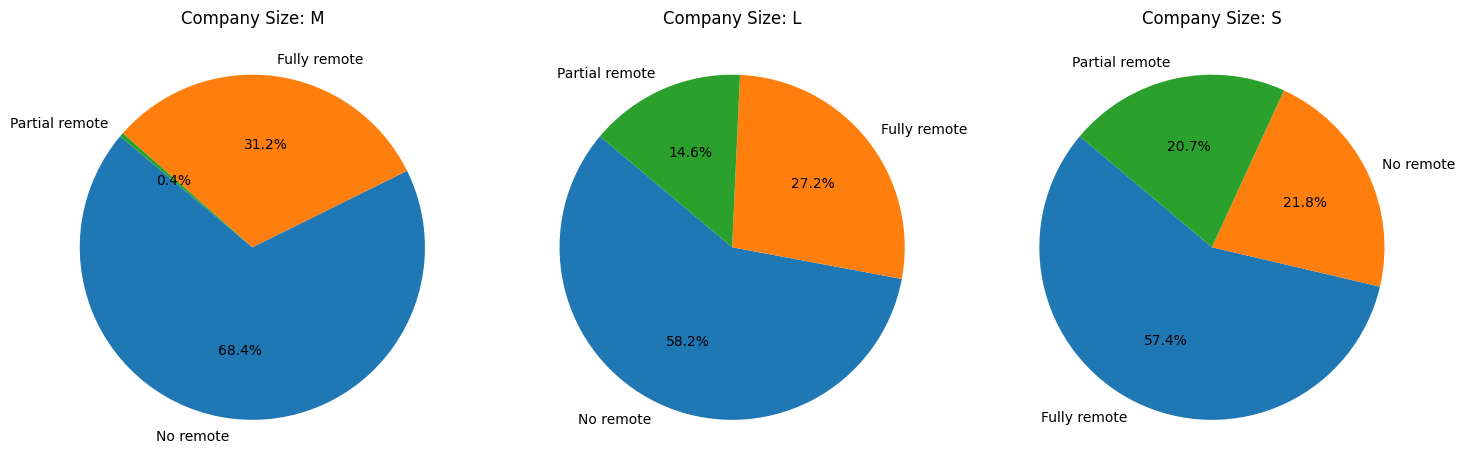

In [198]:

# Recode remote_ratio for better understanding
df['remote_ratio'] = df['remote_ratio'].map({0: 'No remote', 50: 'Partial remote', 100: 'Fully remote'})

# Create a pie chart for each company size showing the distribution of remote work
company_sizes = df['company_size'].unique()

fig, axes = plt.subplots(1, len(company_sizes), figsize=(15, 6), subplot_kw=dict(aspect="equal"))

for ax, size in zip(axes, company_sizes):
    size_data = df[df['company_size'] == size]
    remote_counts = size_data['remote_ratio'].value_counts()
    ax.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Company Size: {size}')

plt.tight_layout()
plt.show()

* S = Small / Pequeña
* M = Medium / Mediana
* L = Large / Grande

C:\Users\FRANK\AppData\Local\Temp\ipykernel_2900\1238733361.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cambio_empleo', y='job_title', data=cambios_top_empleo, palette='coolwarm', dodge=False)


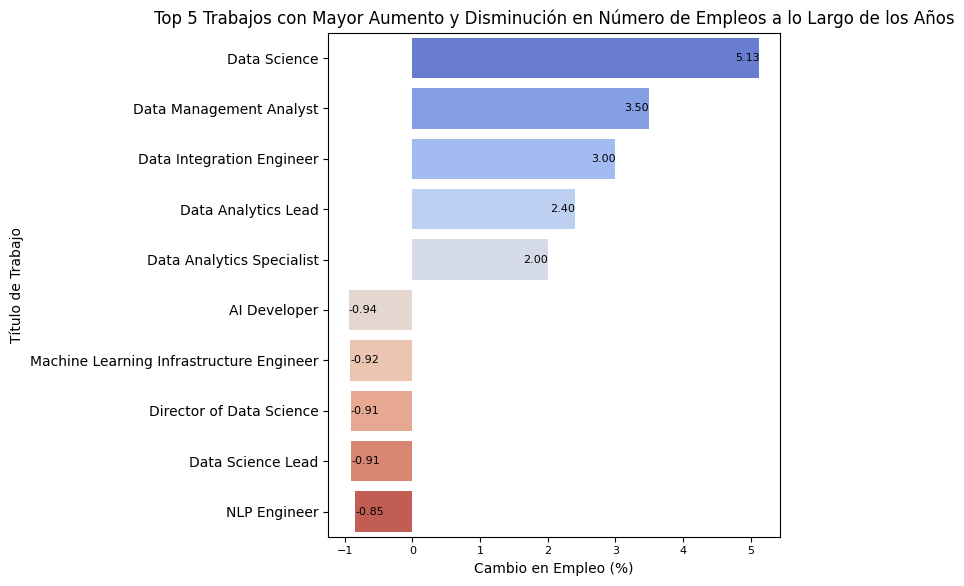

In [197]:
# Agrupar los datos por años y determinar el cambio en el número de empleos para cada título de trabajo
cambios_empleo = df.groupby(['work_year', 'job_title']).size().unstack(level=0)

# Calcular el cambio porcentual en el número de empleos entre los años
cambios_empleo['cambio_empleo'] = cambios_empleo.pct_change(axis=1, fill_method=None).iloc[:, -1]

# Obtener los 5 títulos con el mayor aumento en el número de empleos
top_5_aumento_empleo = cambios_empleo['cambio_empleo'].nlargest(5).reset_index()

# Obtener los 5 títulos con la mayor disminución en el número de empleos
top_5_disminucion_empleo = cambios_empleo['cambio_empleo'].nsmallest(5).reset_index()

# Concatenar los 5 mayores aumentos y disminuciones
cambios_top_empleo = pd.concat([top_5_aumento_empleo, top_5_disminucion_empleo])

# Crear el gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='cambio_empleo', y='job_title', data=cambios_top_empleo, palette='coolwarm', dodge=False)
plt.title('Top 5 Trabajos con Mayor Aumento y Disminución en Número de Empleos a lo Largo de los Años')
plt.xlabel('Cambio en Empleo (%)')
plt.ylabel('Título de Trabajo')

# Anotar cada barra con su valor respectivo
for index, value in enumerate(cambios_top_empleo['cambio_empleo']):
    ax.text(value, index, f'{value:.2f}', va='center', ha='right' if value > 0 else 'left', size=8)

plt.tight_layout()
plt.xticks(size=8)
plt.show()